In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import plotly.express as px
import numpy as np

In [6]:
BASE_URL = "https://db.whoifloatgroup.org"
#BASE_URL = "http://127.0.0.1:8000"

headers = {'Content-Type':'application/json'}

def get_wmo_assigned(PLATFORM_TYPE):
    response = requests.get(BASE_URL+"/api/wmo_assigned", headers=headers,
            params={"PLATFORM_TYPE":PLATFORM_TYPE})
    
    if response.status_code==200:
        return pd.DataFrame(json.loads(response.content))
    raise Exception('ERROR: ', response.status_code)

PLATFORMTYPE = "&PLATFORM_TYPE=NAVIS_EBR"

def get_cal2(floatnum):
    floatnum = "FLOAT_SERIAL_NO=" + str(floatnum) + PLATFORMTYPE
    response = requests.get(BASE_URL+"/api/cal?"+floatnum)

    if response.status_code==200:
        return pd.DataFrame(json.loads(response.content))
    raise Exception('ERROR: ', response.status_code)


def get_metadata_all(output_fields):
    response = requests.get(BASE_URL+"/api/deployment_metadata", headers=headers, 
        params={"deployment_fields":output_fields, "PLATFORM_TYPE":"NAVIS_EBR"})

    if response.status_code==200:
        return pd.DataFrame(json.loads(response.content))
    raise Exception('ERROR: ', response.status_code)

In [7]:
sn = get_metadata_all("FLOAT_SERIAL_NO")
WMO = get_metadata_all("PLATFORM_NUMBER")

df = pd.concat([sn, WMO], axis=1)
df

,FLOAT_SERIAL_NO,PLATFORM_NUMBER
0,1343,4903456
1,1528,None
2,1529,None
3,1530,None
4,1477,4903533
5,1539,None
6,1475,4903489
7,1476,4903532
8,1359,4903462
9,1361,4903487


In [8]:
flts = get_wmo_assigned("NAVIS_EBR")
sn = flts.FLOAT_SERIAL_NO
sn

0     1343
1     1477
2     1475
3     1476
4     1359
5     1361
6     1474
7     1360
8     1486
9     1487
10    1344
11    1482
12    1484
13    1485
14    1488
15    1490
16    1203
17    1357
18    1356
19    1345
20    1346
21    1351
22    1201
23    1347
24    1348
25    1355
26    1354
27    1352
28    1200
29    1349
30    1350
31    1353
Name: FLOAT_SERIAL_NO, dtype: object

In [9]:
meta = []
for sns in (sn):
    df = get_cal2(sns)
    meta.append(df)
meta

display(meta[0])

,CTD_TEMP,OPTODE_DOXY,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE,TRANSISTOR_PH,CTD_CNDC,CTD_PRES
SENSOR_MAKER,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC,SBE,SBE,DRUCK
SENSOR_MODEL,SBE41CP_V5.3.5,SBE63_V3.2.2,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2,SEAFET,SBE41CP_V5.3.5,DRUCK_2900PSIA
SENSOR_SERIAL_NO,13874,2767,283,283,283,1531,720-11557,13874,11701159
SENSOR_CALIB_DATE,2021-03-30,2021-02-02,2020-12-10,2020-12-10,2020-12-10,2021-01-21,2022-06-09,2021-03-30,2021-04-13
COMMENTS,None,,,,,,O-Ring: Buna L,None,
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'TA0': -0.0008772702, 'TA1': 0.0002898737, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.01218}","{'DARK_CHLA': 50, 'SCALE_CHLA': 0.003133}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [-0.00188198, 0.0006494, -0.00162182, ...","{'F0': -0.0025731, 'F1': 1.3332e-05, 'F2': -1....","{'G': -1.012498, 'H': 0.1452433, 'I': -0.00027...","{'PA0': 1.899773, 'PA1': 0.0003910863, 'PA2': ..."


In [10]:
cal = []
for i, metas in enumerate(meta):
    cal.append(metas["BACKSCATTERINGMETER_BBP700"].PREDEPLOYMENT_CALIB_COEFFICIENT)
cal

[{'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 49,
  'SCALE_BACKSCATTERING700': 5.021e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 49,
  'SCALE_BACKSCATTERING700': 3.808e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 50,
  'SCALE_BACKSCATTERING700': 3.84e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 48,
  'SCALE_BACKSCATTERING700': 3.227e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 48,
  'SCALE_BACKSCATTERING700': 3.133e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 49,
  'SCALE_BACKSCATTERING700': 3.469e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124 angularDeg',
  'DARK_BACKSCATTERING700': 48,
  'SCALE_BACKSCATTERING700': 3.797e-07},
 {'KHI': 1.097,
  'BETASW700': 'calculated at 124

DARK_BACKSCATTERING700
The mean is: 49.29032258064516
The std is: 1.4186215114384528
SCALE_BACKSCATTERING700
The mean is: 3.801870967741935e-07
The std is: 7.078585489249674e-08


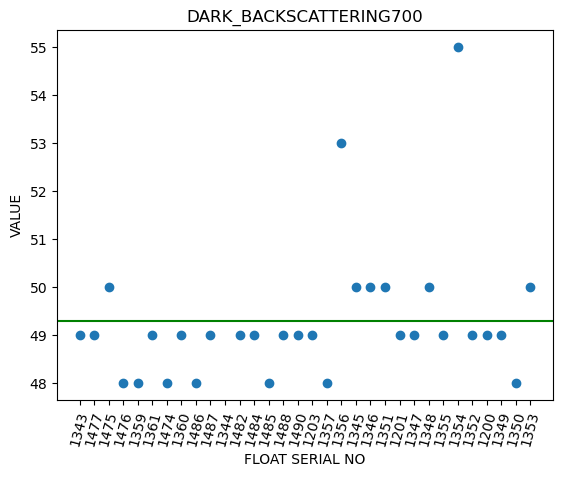

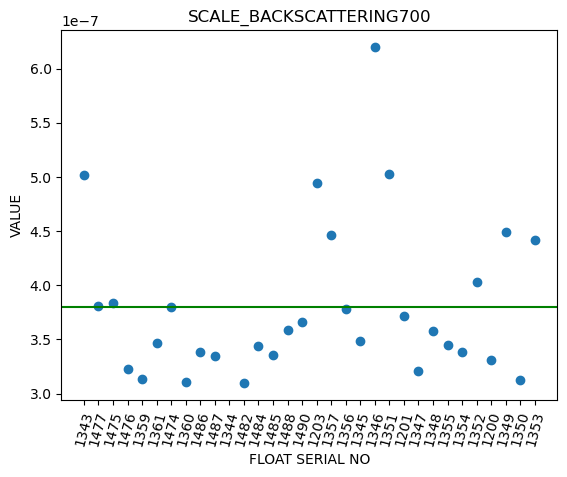

In [11]:
variables = ["DARK_BACKSCATTERING700","SCALE_BACKSCATTERING700"]
counter = 0

for variable in variables:
    coefficients = []
    serials = []
    counter2 = 0
    for num in cal: 
        if variable in num:
            coefficients.append(num[variable])
            serials.append(sn[counter2])
        counter2+=1
    
    coefficient_array = np.array(coefficients)
    coeff_array = np.delete(coefficient_array, np.where(coefficient_array == None))
    #print(coeff_array)
    print(variable)
    mean = coeff_array.mean()
    std = coeff_array.std()
    print("The mean is:", coeff_array.mean())
    print("The std is:", coeff_array.std())

    plt.figure(counter)
    plt.xlabel("FLOAT SERIAL NO")
    plt.ylabel("VALUE")
    plt.title(variable)
    plt.scatter(serials,coefficients)
    plt.axhline(y = mean, color='green')
    #plt.axhline(y = std, color= 'red')
    plt.xticks(rotation= 75)
    counter+=1